In [81]:
import pandas as pd
df1 = pd.read_excel("Spare parts.xlsx",sheet_name=0)
df1

,Material,Material Description,SLoc,Area,MvT,Doc_Date,Qty.,Amount
0,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-09-14,15.0,28.12
1,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-09-08,10.0,18.74
2,15,Plain Washer Din125 A10&5 A2,M2SH,KARAD,261,2016-08-12,8.0,15.00
3,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-08-06,10.0,18.75
4,15,Plain Washer Din125 A10&5 A2,M4P3,C'SHWAR STR,261,2016-08-06,10.0,18.75
...,...,...,...,...,...,...,...,...
7555,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,KARAD,261,2015-12-03,1.0,0.00
7556,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,262,2015-10-19,-1.0,0.00
7557,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4P3,Area2,262,2015-09-16,-1.0,0.00
7558,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,KARAD,261,2015-09-11,1.0,0.00


In [82]:
df2 = pd.read_excel("Spare parts.xlsx",sheet_name=1)
df2

,Material,Material Description,SLoc,Area,MvT,Doc_Date,Quantity,Amount LC
0,15,Plain Washer Din125 A10&5 A2,M4BH,Area1,261,2014-09-08,10.0,18.74
1,15,Plain Washer Din125 A10&5 A2,M1BH,Area1,261,2014-09-08,6.0,11.25
2,15,Plain Washer Din125 A10&5 A2,M2SH,Area1,261,2014-08-05,2.0,3.75
3,15,Plain Washer Din125 A10&5 A2,M4CV,Area2,261,2014-06-29,25.0,46.86
4,15,Plain Washer Din125 A10&5 A2,M1MH,Area1,261,2014-06-28,4.0,7.50
...,...,...,...,...,...,...,...,...
29972,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,261,2015-12-03,1.0,0.00
29973,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,262,2015-10-19,-1.0,0.00
29974,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4P3,Area2,262,2015-09-16,-1.0,0.00
29975,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,261,2015-09-11,1.0,0.00


In [83]:
print(df1.columns , "---" , df2.columns)

Index(['Material', 'Material Description', 'SLoc', 'Area', 'MvT', 'Doc_Date',
       'Qty.', 'Amount'],
      dtype='object') --- Index(['Material', 'Material Description', 'SLoc', 'Area', 'MvT', 'Doc_Date',
       '     Quantity', '     Amount LC'],
      dtype='object')


In [84]:
df2.rename(columns={
    '     Quantity': 'Qty.', 
    '     Amount LC': 'Amount' 
}, inplace=True)

In [85]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [86]:
print(df1.isna().sum(),"--" , df2.isna().sum())

Material                0
Material Description    0
SLoc                    0
Area                    0
MvT                     0
Doc_Date                0
Qty.                    0
Amount                  0
dtype: int64 -- Material                0
Material Description    0
SLoc                    0
Area                    0
MvT                     0
Doc_Date                0
Qty.                    0
Amount                  0
dtype: int64


In [87]:
final_data = pd.concat([df1, df2], ignore_index=True)
final_data.columns

Index(['Material', 'Material Description', 'SLoc', 'Area', 'MvT', 'Doc_Date',
       'Qty.', 'Amount'],
      dtype='object')

In [88]:
final_data.to_csv("final_data.csv",index=False)

#### Model Building 

In [89]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [90]:
df = pd.read_csv('final_data.csv')
df['Doc_Date'] = pd.to_datetime(df['Doc_Date'])
df['Month'] = df['Doc_Date'].dt.to_period('M')

In [91]:
def detect_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)  
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers, lower_bound, upper_bound = detect_outliers(df, 'Qty.')

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
print("Outlier Rows:")
print(outliers)


Lower Bound: -5.0, Upper Bound: 11.0
Number of Outliers: 4575
Outlier Rows:
      Material                     Material Description  SLoc         Area  \
0           15             Plain Washer Din125 A10&5 A2  M4P1  C'SHWAR STR   
11          15             Plain Washer Din125 A10&5 A2  M4P4  C'SHWAR STR   
12          15             Plain Washer Din125 A10&5 A2  M4P2  C'SHWAR STR   
23          15             Plain Washer Din125 A10&5 A2  M1GU        KARAD   
24          15             Plain Washer Din125 A10&5 A2  M1GU        KARAD   
...        ...                                      ...   ...          ...   
37057    92290  fitting skintop PG48 brass   1609480060  M4P3        Area2   
37059    92290  fitting skintop PG48 brass   1609480060  M4P4        Area2   
37060    92291      counternet brass nickel plated PG48  M4P3        Area2   
37062    92291      counternet brass nickel plated PG48  M4P4        Area2   
37141    92862  sticker  PCB IGBT DRIVER TERMINAL COVER  M4P2     

Lower Bound: -5.0, Upper Bound: 11.0
Number of Outliers Removed/Handled: 0
Outlier Rows After Handling:
Empty DataFrame
Columns: [Material, Material Description, SLoc, Area, MvT, Doc_Date, Qty., Amount, Month]
Index: []


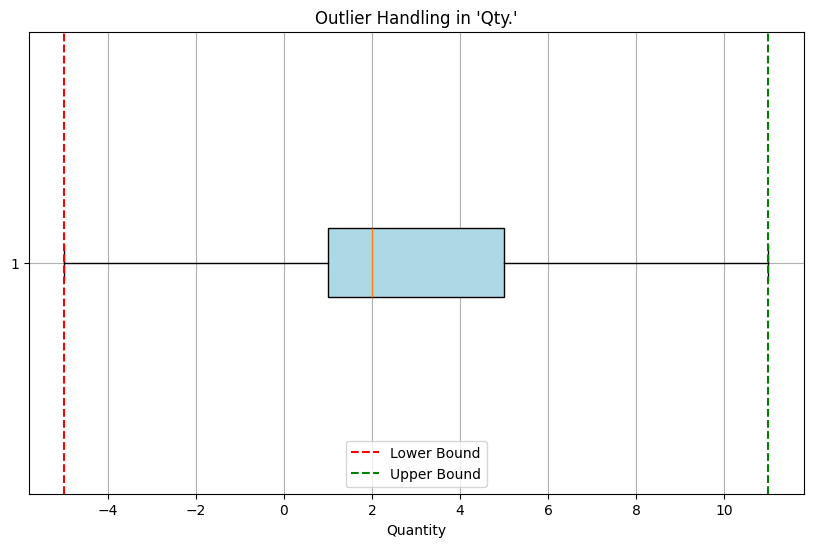

In [92]:
def handle_outliers(data, column_name, strategy='remove'):
    """Handle outliers using specified strategy ('remove', 'cap', or 'impute')."""
    outliers, lower_bound, upper_bound = detect_outliers(data, column_name)
    
    if strategy == 'remove':
        data_cleaned = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    elif strategy == 'cap':
        data_cleaned = data.copy()
        data_cleaned[column_name] = np.clip(data[column_name], lower_bound, upper_bound)
    elif strategy == 'impute':
        median_value = data[column_name].median()
        data_cleaned = data.copy()
        data_cleaned[column_name] = np.where(
            (data[column_name] < lower_bound) | (data[column_name] > upper_bound),
            median_value, 
            data[column_name]
        )
    else:
        raise ValueError("Invalid strategy. Choose 'remove', 'cap', or 'impute'.")
    
    return data_cleaned

strategy = 'cap'  
df = handle_outliers(df, 'Qty.', strategy)
outliers_removed, lower_bound, upper_bound = detect_outliers(df, 'Qty.')
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of Outliers Removed/Handled: {len(outliers_removed)}")
print("Outlier Rows After Handling:")
print(outliers_removed)

plt.figure(figsize=(10, 6))
plt.boxplot(df['Qty.'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title("Outlier Handling in 'Qty.'")
plt.xlabel("Quantity")
plt.legend()
plt.grid()
plt.show()


In [93]:
monthly_data = df.groupby(['Material', 'Month'])['Qty.'].sum().reset_index()
pivot_data = monthly_data.pivot(index='Month', columns='Material', values='Qty.').fillna(0)

In [94]:
total_consumption = pivot_data.sum(axis=0)
high_consumption_materials = total_consumption[total_consumption > total_consumption.quantile(0.8)].index
high_consumption_data = pivot_data[high_consumption_materials]

material_to_forecast = high_consumption_materials[0]
series = high_consumption_data[material_to_forecast]

In [95]:
train = series[:-12]
test = series[-12:]

In [96]:
arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=12)

In [97]:
lags = 12
df_lagged = pd.DataFrame({'Actual': series})
for lag in range(1, lags + 1):
    df_lagged[f'Lag_{lag}'] = series.shift(lag)

df_lagged.dropna(inplace=True)

In [98]:
X = df_lagged.drop('Actual', axis=1)
y = df_lagged['Actual']

In [99]:

X_train, X_test, y_train, y_test = train_test_split(
    X[:-12], y[:-12], test_size=0.2, random_state=42
)


In [100]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_forecast = rf_model.predict(X[-12:])


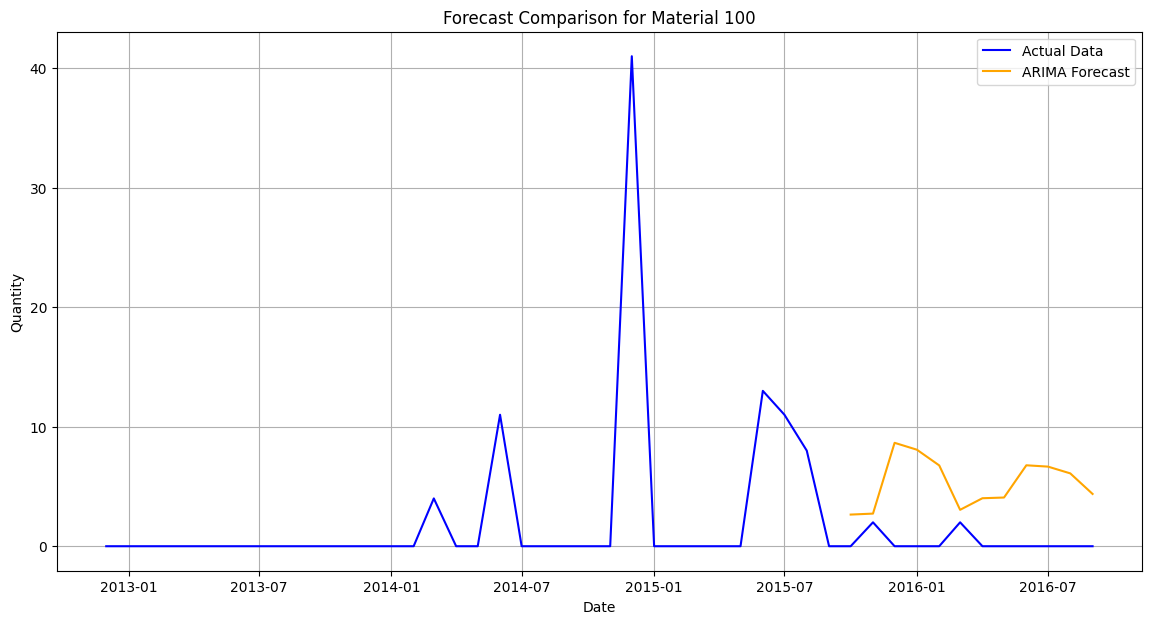

In [101]:

plt.figure(figsize=(14, 7))
plt.plot(series.index.to_timestamp(), series, label='Actual Data', color='blue')
plt.plot(test.index.to_timestamp(), arima_forecast, label='ARIMA Forecast', color='orange')
plt.title(f"Forecast Comparison for Material {material_to_forecast}")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

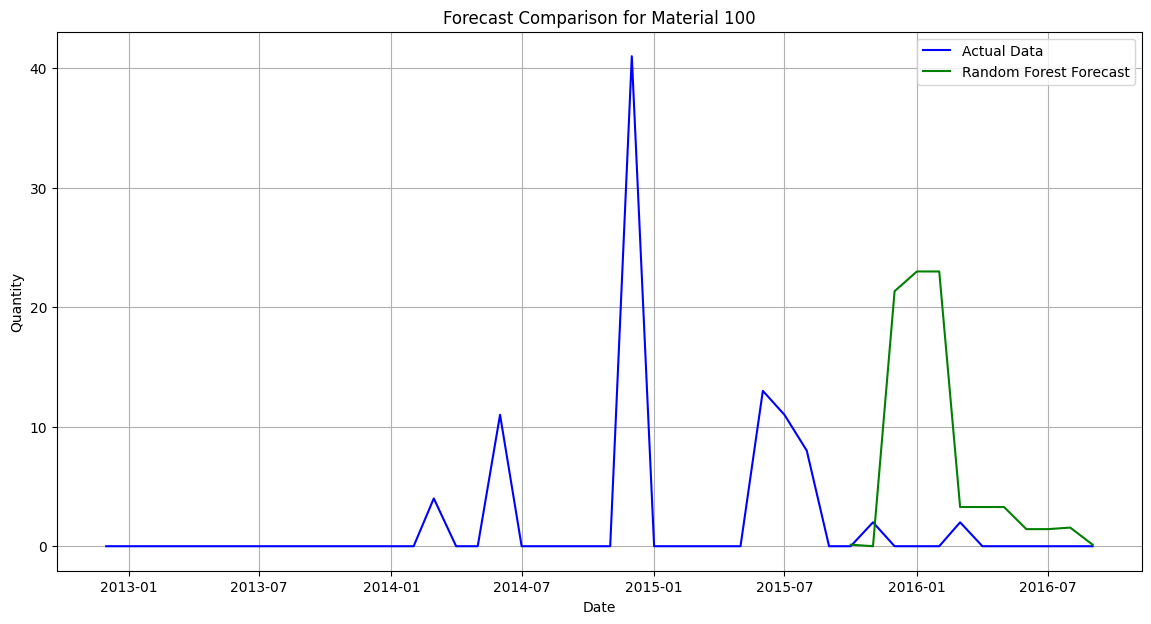

In [102]:

plt.figure(figsize=(14, 7))
plt.plot(series.index.to_timestamp(), series, label='Actual Data', color='blue')
plt.plot(test.index.to_timestamp(), rf_forecast, label='Random Forest Forecast', color='green')
plt.title(f"Forecast Comparison for Material {material_to_forecast}")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()